In [121]:
import keras
import numpy
from keras.layers import Dense, Input, Lambda, Flatten, SimpleRNN, GRU
from keras.models import Model
from keras import backend as K
from keras.optimizers import Adam
import pandas as pd
import numpy as np

In [190]:
# Model Feedforward
inputs = Input(shape = (1,))
x = Dense(32, activation = 'sigmoid')(inputs)
x = Dense(16, activation = 'sigmoid')(x)
y = Dense(4 , activation = 'linear')(x)
model = Model(inputs=inputs, outputs=y)

In [198]:
step = 10
d = 0
X = []
Y = []
for i in range(len(Vin)-step):
    d = i+step  
    X.append(Vin[i:d,])
# Model Recursive RNN
inputs = Input(shape = (1,step,))
x = SimpleRNN(units=32,  activation="relu")(inputs)
x = Dense(16, activation = 'sigmoid')(x)
y = Dense(4 , activation = 'linear')(x)
model = Model(inputs=inputs, outputs=y)


In [144]:
# Model Recursive GRU
inputs = Input(shape = (1,1))
x = GRU(10, input_shape=(1,10), activation='tanh', return_sequences=True)(inputs)
x = Dense(16, activation = 'sigmoid')(x)
y = Dense(4 , activation = 'linear')(x)
model = Model(inputs=inputs, outputs=y)

In [194]:
path = '../PendulumData'
data = '/SwingUpData1/'
Vin = pd.read_csv(path + data + 'Vin', header=None)
Vin = Vin.values[:,1]
theta = pd.read_csv(path + data + 'theta', header=None)
theta = theta.values[:,1]
alpha = pd.read_csv(path + data + 'alpha', header=None) 
alpha = alpha.values[:,1]
thetadot = pd.read_csv(path + data + 'thetadot', header=None)
thetadot = thetadot.values[:,1]
alphadot = pd.read_csv(path + data + 'alphadot', header=None)
alphadot = alphadot.values[:,1]
y_real = np.array([theta,alpha,thetadot,alphadot]).T

In [195]:
path = '../PendulumData'
data = '/SwingUpData1_sim/'
theta_hat = pd.read_csv(path + data + 'theta', header=None)
theta_hat = theta_hat.values[0,:]
alpha_hat = pd.read_csv(path + data + 'alpha', header=None) 
alpha_hat = alpha_hat.values[0,:]
thetadot_hat = pd.read_csv(path + data + 'thetadot', header=None)
thetadot_hat = thetadot_hat.values[0,:]
alphadot_hat = pd.read_csv(path + data + 'alphadot', header=None)
alphadot_hat = alphadot_hat.values[0,:]
y_hat = np.array([theta_hat,alpha_hat,thetadot,alphadot_hat]).T

In [196]:
y_error = y_real - y_hat
Vin.reshape(1,5001)

array([[-1.1164  , -1.2398  , -1.3402  , ..., -0.042947, -0.042947,
        -0.042948]])

In [200]:
np.shape(X)

(4991, 10)

In [213]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_38 (InputLayer)        (None, 1, 10)             0         
_________________________________________________________________
simple_rnn_17 (SimpleRNN)    (None, 32)                1376      
_________________________________________________________________
dense_79 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_80 (Dense)             (None, 4)                 68        
Total params: 1,972
Trainable params: 1,972
Non-trainable params: 0
_________________________________________________________________


In [203]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [212]:
model.fit(np.expand_dims(X, axis=1),y_error[10:], epochs=200, batch_size=16, verbose=2)

Epoch 1/200
 - 0s - loss: 0.1599 - acc: 0.7766
Epoch 2/200
 - 0s - loss: 0.1669 - acc: 0.7710
Epoch 3/200
 - 0s - loss: 0.1602 - acc: 0.7776
Epoch 4/200
 - 0s - loss: 0.1690 - acc: 0.7764
Epoch 5/200
 - 0s - loss: 0.1675 - acc: 0.7818
Epoch 6/200
 - 0s - loss: 0.1624 - acc: 0.7712
Epoch 7/200
 - 0s - loss: 0.1628 - acc: 0.7780
Epoch 8/200
 - 0s - loss: 0.1601 - acc: 0.7758
Epoch 9/200
 - 0s - loss: 0.1632 - acc: 0.7786
Epoch 10/200
 - 0s - loss: 0.1600 - acc: 0.7712
Epoch 11/200
 - 0s - loss: 0.1632 - acc: 0.7790
Epoch 12/200
 - 0s - loss: 0.1556 - acc: 0.7780
Epoch 13/200
 - 0s - loss: 0.1565 - acc: 0.7736
Epoch 14/200
 - 0s - loss: 0.1660 - acc: 0.7720
Epoch 15/200
 - 0s - loss: 0.1635 - acc: 0.7686
Epoch 16/200
 - 0s - loss: 0.1592 - acc: 0.7722
Epoch 17/200
 - 0s - loss: 0.1688 - acc: 0.7698
Epoch 18/200
 - 0s - loss: 0.1667 - acc: 0.7772
Epoch 19/200
 - 0s - loss: 0.1606 - acc: 0.7750
Epoch 20/200
 - 0s - loss: 0.1654 - acc: 0.7804
Epoch 21/200
 - 0s - loss: 0.1631 - acc: 0.7812
E

Epoch 171/200
 - 0s - loss: 0.1565 - acc: 0.7828
Epoch 172/200
 - 0s - loss: 0.1484 - acc: 0.7844
Epoch 173/200
 - 0s - loss: 0.1423 - acc: 0.7842
Epoch 174/200
 - 0s - loss: 0.1553 - acc: 0.7776
Epoch 175/200
 - 0s - loss: 0.1456 - acc: 0.7868
Epoch 176/200
 - 0s - loss: 0.1469 - acc: 0.7870
Epoch 177/200
 - 0s - loss: 0.1588 - acc: 0.7802
Epoch 178/200
 - 0s - loss: 0.1518 - acc: 0.7886
Epoch 179/200
 - 0s - loss: 0.1538 - acc: 0.7836
Epoch 180/200
 - 0s - loss: 0.1494 - acc: 0.7862
Epoch 181/200
 - 0s - loss: 0.1471 - acc: 0.7858
Epoch 182/200
 - 0s - loss: 0.1450 - acc: 0.7822
Epoch 183/200
 - 0s - loss: 0.1482 - acc: 0.7836
Epoch 184/200
 - 0s - loss: 0.1484 - acc: 0.7886
Epoch 185/200
 - 0s - loss: 0.1566 - acc: 0.7872
Epoch 186/200
 - 0s - loss: 0.1481 - acc: 0.7880
Epoch 187/200
 - 0s - loss: 0.1514 - acc: 0.7846
Epoch 188/200
 - 0s - loss: 0.1492 - acc: 0.7784
Epoch 189/200
 - 0s - loss: 0.1475 - acc: 0.7882
Epoch 190/200
 - 0s - loss: 0.1507 - acc: 0.7816
Epoch 191/200
 - 0s 

In [214]:
path = '../PendulumData'
data = '/SwingUpData2_sim/'
theta_hat = pd.read_csv(path + data + 'theta', header=None)
theta_hat = theta_hat.values[0,:]
alpha_hat = pd.read_csv(path + data + 'alpha', header=None) 
alpha_hat = alpha_hat.values[0,:]
thetadot_hat = pd.read_csv(path + data + 'thetadot', header=None)
thetadot_hat = thetadot_hat.values[0,:]
alphadot_hat = pd.read_csv(path + data + 'alphadot', header=None)
alphadot_hat = alphadot_hat.values[0,:]
y_hat_predict = np.array([theta_hat,alpha_hat,thetadot,alphadot_hat]).T

In [219]:
path = '../PendulumData'
data = '/SwingUpData2/'
Vin_predict = pd.read_csv(path + data + 'Vin', header=None)
Vin_predict = Vin_predict.values[:,1]
theta = pd.read_csv(path + data + 'theta', header=None)
theta = theta.values[:,1]
alpha = pd.read_csv(path + data + 'alpha', header=None) 
alpha = alpha.values[:,1]
thetadot = pd.read_csv(path + data + 'thetadot', header=None)
thetadot = thetadot.values[:,1]
alphadot = pd.read_csv(path + data + 'alphadot', header=None)
alphadot = alphadot.values[:,1]
y_real_predict = np.array([theta,alpha,thetadot,alphadot]).T

In [224]:
y_error_predict = y_real_predict - y_hat_predict
X_predict = []
for i in range(len(Vin_predict)-step):
    d = i+step  
    X_predict.append(Vin[i:d,])

In [233]:
y_error_predict_predict = model.predict(np.expand_dims(X_predict, axis=1))

In [234]:
import matplotlib.pyplot as plt

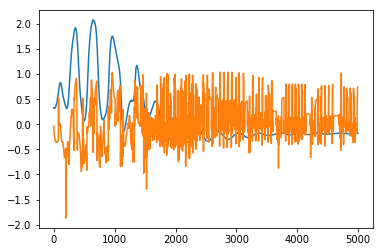

In [240]:
plt.plot(y_error_predict[:,0])
plt.plot(y_error_predict_predict[:,0])